# Deep Learning: Assignment 1. Cat, Dog, Car or Bike?

**Dataset:** You are provided with a dataset which contains more than 3000 pictures with either a cat, a dog, a motorbike or a car. The dataset has already been split in training, test and validation sets. Your task is to build and train a CNN which is able to recognize which object is depicted in the picture. To this end, you must use and change the code we presented during our tutorial on classifying cat and dog images. You should copy and unzip the dataset in your local directory (do not change the name of the directory), namely the same directory where this jupyter notebook is going to be stored. 

**Python and Keras version.** We recommend you to use Python 3.6 (there might be some incompatibility issues between keras and the most recent versions of Python). We also recommend to use TensorFlow 2.1.0 and Keras 2.3.1, which are the settings we used to test everything. You can find the documentation for keras at the following address https://keras.io/layers/convolutional/.

**What to submit:** You should post on moodle this jupyter notebook filled will all the answers to the questions, the Python code and the plots. Do not change any part of the code that is provided to you, unless explicitly asked. You should also post on moodle the model for question 5 (name of the model "modelQ5.h1"). The answers to the questions should be provided below at the end of the notebook. In case your model has size larger than 100MB please provide a link to Google Drive or other storage services. **Important**: For each question you will get 0 points if the code or any of the plots are missing or the code is not correct.

**GPU Farm**: You will have access to the HKU GPU farm to do this assignment. Additional info on how to use it is contained in a separate document provided with the assignement. Please use this only for questions 4 and 5.

**Image Size** You should use image size 32x32 for the first three questions. You can use higher resolutions for questions 4 and 5. We kindly ask you to use your machine whenever possible, in order to avoid the GPU farm to be overwhelmed. 



In [2]:
import keras
import sys
print("Python: ", sys.version)
print("Keras: ", keras.__version__)

Using TensorFlow backend.


Python:  3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]
Keras:  2.3.1


##### Question 1 (CNN Architecture) 

Define a CNN architecture with the following layers stacked on top of each other in the following order:
1. A convolutional layer with 32 5 × 5 filters. 
2. A max Pooling Layer with size 2 × 2.
3. A convolutional layer with 64 5 × 5 filters. 
4. A max Pooling Layer with size 2 × 2.
5. A convolutional layer with 64 3 × 3 filters. 
6. A max Pooling Layer with size 2 × 2.
7. A convolutional layer with 64 3 × 3 filters. 
7. A max Pooling Layer with size 2 × 2.
9. A dense layer with 256 units.
10. A dense layer with k units and softmax (aka cross entropy) loss function.

Use the sigmoid activation function for all layers but the last one which uses the softmax function. Use default values for the parameters which are not specified above.

a) [5pts] Determine the right value for k and write the value for k you use at the end of the notebook. Write the code to solve a) in the cell below


In [2]:
#documentation:https://keras.io/layers/convolutional/

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='sigmoid',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(256, activation='sigmoid'))
#write your own code for a) here
k=4
model.add(layers.Dense(k, activation='softmax'))

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_4/convolution' (op: 'Conv2D') with input shapes: [?,1,1,64], [3,3,64,64].

b) [5pts] The architecture defined above cannot be built because of an error. You should fix such an error without changing the number of convolutional, pooling or dense layers, the number of filters, the size of the filters, or the number of units. Write at the end of the notebook which strategy did you use and write the code to solve b) in the cell below:

In [3]:
#documentation:https://keras.io/layers/convolutional/
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='sigmoid',
                        input_shape=(32, 32, 3)))

#write your own code for b) here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), padding="same",activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same",activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same",activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
k=4
model.add(layers.Dense(k, activation='softmax'))

## Question 2 (Training a small CNN from scratch)

We are now considering a different CNN architecture specified in the code below. Fill the missing parts (there is a comment specifying which parts must be filled). After that train such a CNN using the following values for the parameters:

- loss function=crossentropy;
- optimizer RMSprop with learning rate = 0.1;
- metrics= accuracy;
- Batch size for the training/validation generators=20; 
- epochs=30.

Train the CNN and plot both the training/validation accuracy and training/validation loss as a function of the epochs. Write the code and report the plots in the cells below:

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 4s 39ms/step - loss: 22.5202 - acc: 0.2612 - val_loss: 17.2887 - val_acc: 0.2452
Epoch 2/30
100/100 [==============================] - 3s 33ms/step - loss: 20.6727 - acc: 0.2397 - val_loss: 7.0827 - val_acc: 0.2864
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 20.3715 - acc: 0.2381 - val_loss: 13.0972 - val_acc: 0.2101
Epoch 4/30
100/100 [==============================] - 3s 33ms/step - loss: 20.1234 - acc: 0.2496 - val_loss: 29.5202 - val_acc: 0.2251
Epoch 5/30
100/100 [==============================] - 3s 35ms/step - loss: 19.9346 - acc: 0.2561 - val_loss: 13.3231 - val_acc: 0.2332
Epoch 6/30
100/100 [==============================] - 4s 38ms/step - loss: 20.3198 - acc: 0.2441 - val_loss: 29.7648 - val_acc: 0.2354
Epoch 7/30
100/100 [==============================] - 3s 33ms/step - loss: 20.0657 - acc: 0.2531 - val_loss:

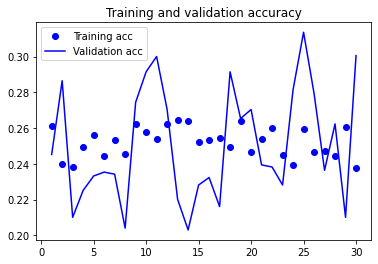

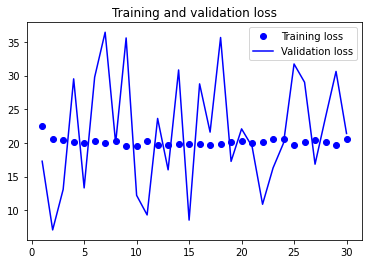

In [3]:
import os
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
# something is missing here 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax')) #replace k with the corresponding value

#fill this part ...
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=0.1),
            metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
    
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

a) [5pts] What is the main problem for your model?

1. Overfitting
2. Underfitting

Write your answer below at the end of the notebook. 


b) [5pts] Without changing the learning rate, change one hyperparameter so as to improve the training error. 

Which hyperparameters did you change? Write your answer below at the end of the notebook. 

Plot both the training/validation accuracy and training/validation loss as a function of the epochs. Report the plots and the code in the cells below.


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 3s 28ms/step - loss: 2543908.5976 - acc: 0.2591 - val_loss: 1.3805 - val_acc: 0.2894
Epoch 2/30
100/100 [==============================] - 3s 27ms/step - loss: 1.4745 - acc: 0.2652 - val_loss: 1.4602 - val_acc: 0.2854
Epoch 3/30
100/100 [==============================] - 3s 26ms/step - loss: 1.4230 - acc: 0.2548 - val_loss: 1.3767 - val_acc: 0.2101
Epoch 4/30
100/100 [==============================] - 2s 24ms/step - loss: 1.3958 - acc: 0.2672 - val_loss: 1.3447 - val_acc: 0.2794
Epoch 5/30
100/100 [==============================] - 3s 26ms/step - loss: 1.3888 - acc: 0.2697 - val_loss: 1.4619 - val_acc: 0.3025
Epoch 6/30
100/100 [==============================] - 3s 28ms/step - loss: 1.3875 - acc: 0.2802 - val_loss: 1.2765 - val_acc: 0.2879
Epoch 7/30
100/100 [==============================] - 3s 25ms/step - loss: 1.3903 - acc: 0.2697 - val_loss: 1.316

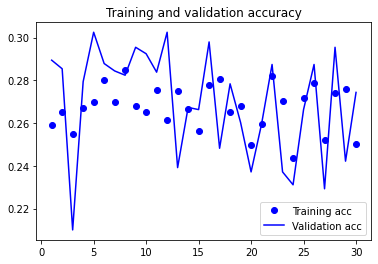

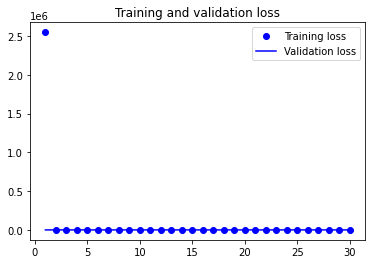

In [12]:
import os
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

# fill this part

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

#fill this part ...
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=0.1),
            metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
    

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Question 3 (Optimize the learning rate) 

a)[10pts] Determine an interval [a,b] of possible values for the learning rate, which is “wide enough”. In particular, you should try to guarantee that your interval contains an optimal value for the learning rate. At the same time the interval that you provided should not be too wide, due to efficiency reasons. In particular, your interval [a,b] should be such that $\frac{b}{a} \leq 10^5$.

b)[15pts] Provide a "good" value for the learning rate. In particular, the training error should become smaller than 0.1 within 30 epochs. 

Write your answers below at the end of the notebook.

Using a good value for the the learning rate, plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots below:


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 3s 28ms/step - loss: 0.9382 - acc: 0.5654 - val_loss: 0.8973 - val_acc: 0.6161
Epoch 2/30
100/100 [==============================] - 3s 26ms/step - loss: 0.6038 - acc: 0.7163 - val_loss: 0.4470 - val_acc: 0.7467
Epoch 3/30
100/100 [==============================] - 3s 27ms/step - loss: 0.4936 - acc: 0.7709 - val_loss: 0.6475 - val_acc: 0.7678
Epoch 4/30
100/100 [==============================] - 3s 25ms/step - loss: 0.4147 - acc: 0.7925 - val_loss: 0.4912 - val_acc: 0.8101
Epoch 5/30
100/100 [==============================] - 3s 26ms/step - loss: 0.3449 - acc: 0.8391 - val_loss: 0.6001 - val_acc: 0.8121
Epoch 6/30
100/100 [==============================] - 3s 29ms/step - loss: 0.2950 - acc: 0.8678 - val_loss: 0.7481 - val_acc: 0.8101
Epoch 7/30
100/100 [==============================] - 2s 25ms/step - loss: 0.2550 - acc: 0.8859 - val_loss: 1.1901 - va

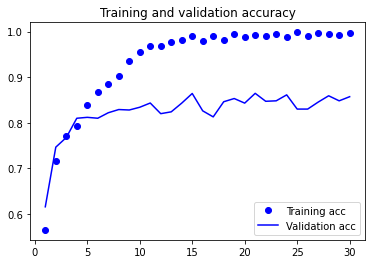

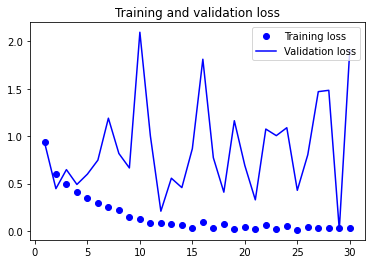

In [20]:
###### import os
from keras import layers
from keras import models
from keras import optimizers

# fill this part

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

#fill this part ...
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=0.001),
            metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
    
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



## Question 4 (Transfer Learning) [25pts]

Use the VGG16 as feature extractor with data augmentation (i.e. remove the top layer and freeze the VGGnet). Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots and the code in the cells below. You should try to achieve a validation accuracy of at least 96\%. Report the accuracy of your model on the test set. 

Write the answers below at the end of the notebook. 


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 261s 3s/step - loss: 0.5769 - acc: 0.7920 - val_loss: 0.2923 - val_acc: 0.9427
Epoch 2/30
100/100 [==============================] - 265s 3s/step - loss: 0.2549 - acc: 0.9110 - val_loss: 0.2528 - val_acc: 0.9166
Epoch 3/30
100/100 [==============================] - 263s 3s/step - loss: 0.2033 - acc: 0.9251 - val_loss: 0.1573 - val_acc: 0.9558
Epoch 4/30
100/100 [==============================] - 263s 3s/step - loss: 0.1801 - acc: 0.9313 - val_loss: 0.1629 - val_acc: 0.9628
Epoch 5/30
100/100 [==============================] - 265s 3s/step - loss: 0.1634 - acc: 0.9388 - val_loss: 0.1436 - val_acc: 0.9598
Epoch 6/30
100/100 [==============================] - 262s 3s/step - loss: 0.1481 - acc: 0.9462 - val_loss: 0.0782 - val_acc: 0.9616
Epoch 7/30
100/100 [==============================] - 263s 3s/step - loss: 0.1432 - acc: 0.9475 - val_loss: 0.1608 - va

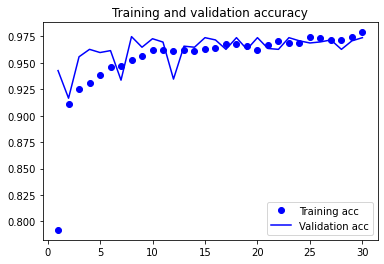

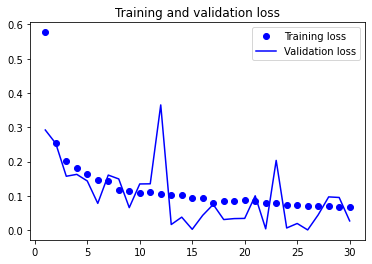

In [34]:
import os
from keras import layers
from keras import models
from keras import optimizers

# fill this part
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
conv_base.trainable = False

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=20,
        class_mode='categorical')
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


To check the accuracy using test data set:

In [35]:
test_dir= os.path.join(base_dir, 'test')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
        test_dir,
        target_size=(256, 256),
        class_mode='categorical')
scores = model.evaluate(
    test_generator, verbose=1)
print("%s: %.4f" % (model.metrics_names[1], scores[1]))

Found 200 images belonging to 4 classes.
7/7 [==============================] - 16s 2s/step
acc: 0.9650


## Question 5 (Open Question) [25pts]

Use any of the techniques we saw during our course so as to improve the validation accuracy of your CNN. Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots and the code in the cells below. You should try to achieve a validation accuracy of at least 98\% and in any case better than the validation accuracy provided in question 4. Report the accuracy of your model on the test set. 

Write the answers below at the end of the notebook. Your model should have max size of 300Mb. Submit your model on moodle.

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 390s 4s/step - loss: 0.6957 - acc: 0.7865 - val_loss: 2.2580 - val_acc: 0.1879
Epoch 2/30
100/100 [==============================] - 380s 4s/step - loss: 0.2248 - acc: 0.9248 - val_loss: 1.7697 - val_acc: 0.2332
Epoch 3/30
100/100 [==============================] - 380s 4s/step - loss: 0.1476 - acc: 0.9504 - val_loss: 3.0871 - val_acc: 0.2704
Epoch 4/30
100/100 [==============================] - 382s 4s/step - loss: 0.1378 - acc: 0.9624 - val_loss: 4.5614 - val_acc: 0.3457
Epoch 5/30
100/100 [==============================] - 379s 4s/step - loss: 0.1039 - acc: 0.9683 - val_loss: 3.0072 - val_acc: 0.4442
Epoch 6/30
100/100 [==============================] - 396s 4s/step - loss: 0.1011 - acc: 0.9699 - val_loss: 3.2483 - val_acc: 0.5970
Epoch 7/30
100/100 [==============================] - 426s 4s/step - loss: 0.1011 - acc: 0.9694 - val_loss: 0.5074 - va

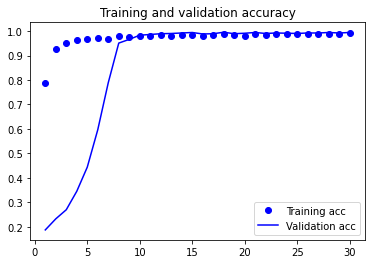

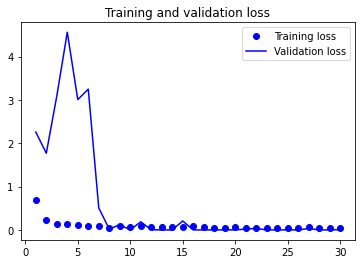

In [38]:
import os
from keras import layers
from keras import models
from keras import optimizers

# fill this part
from keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
# model.summary()
conv_base.trainable = False

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=20,
        class_mode='categorical')

#we freeze all layers before block5_conv1
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv2':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

model.save('modelQ5.h1') #important do not change the name of the model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

To check the accuracy using the test data set:

In [43]:
test_dir= os.path.join(base_dir, 'test')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
        test_dir,
        target_size=(256, 256),
        class_mode='categorical')
scores = model.evaluate(
    test_generator, verbose=1)
print("%s: %.4f" % (model.metrics_names[1], scores[1]))

Found 200 images belonging to 4 classes.
7/7 [==============================] - 31s 4s/step
acc: 0.9850


## Answers

Write your answers next to the corresponding question (same line).

Question 1
* a) What is the right value of k? k = 4, since we have 4 classes and the number of unit (k) should equal to the number of classes.
* b) How did you fix the error in the architecture? Fixed by adding the criteria "padding = "same"", which ensure the output has the same size as the input in each layer.

Question 2
* a) There was a problem of underfitting or overfitting? Underfitting,  since it is experiencing high training error and validation error. 
* b) Which hyperparameter did you change? Activation function changed from Sigmoid to Relu, so as to avoid the vanishing gradient issue in Sigmoid. The training/validation accuracy is slightly increased from around 0.25 (a) to 0.27 in (b). And the loss is greatly reduced to around 1. To further improve the acccuracy, and with the preset of changing learning rate is not available, change the optimizer to Adagrad can greatly improve the accuracy to up to 0.8 since the function help diminish the learning rate.

Question 3
* a) which interval for the learning rate did you consider? Learning rate in the interval of $[1*10^{-6},1*10^{-2}]$ are considered in the question. Since the learning rate = 0.1 is tested on question 2 and did not yield satisfactory results, lr=0.1 is ruled out in for consideration. Therefore, to maintain a "wide enough" interval, the minimum of learning rate is set to $1*10^{-6}$.
* b) which value for the learning rate did you consider? Learning rate = 0.001 is adopted after several trial and error within the $[1*10^{-6},1*10^{-2}]$ interval. It gives the best training accuracy = 0.994 and validation accuracy = 0.823 in average with training loss around 0.03, while comparing with lr=0.005 (train_acc=0.971; val_acc=0.807) and lr=0.0001 (train_acc=0.915; val_acc=0.807). Meanwhile, learning rate 	$\leq 1*10^{-5}$ and $\geq 0.01$ cannot achieve training accuracy $\geq 0.9$ within 30 epochs.

Question 4
* a) what is the validation accuracy of your model? 97.3%
* b) what is the test accuracy of your model? 96.5%

Question 5
* a) what is the validation accuracy of your model? 99.4%
* b) what is the test accuracy of your model? 98.5%
* link to model: https://connecthkuhk-my.sharepoint.com/:u:/g/personal/u3528129_connect_hku_hk/EfHg0eVpKeJOs9VQsoYDdggBKZJ2qH4NCOqbokUJxT5jTw?e=ad6R4g

